# Group Assignment Pattern Recognition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

In [3]:
mnist = pd.read_csv('mnist.csv').values

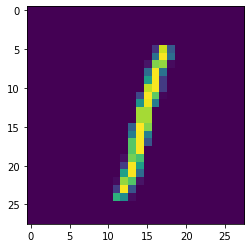

In [4]:
labels = mnist[:, 0]
digits = mnist[:, 1:]
img_size = 28
plt.imshow(digits[15].reshape(img_size, img_size))
plt.show()

## Task 1

In [5]:
# get descriptive statistics
df = pd.DataFrame(digits)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
# remove constant columns (i.e. pixels with no ink)
var_thr = VarianceThreshold(threshold = 0.01)
var_thr.fit(df)
concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]
df = df.drop(concol,axis=1) # 708 columns remaining
df.describe()

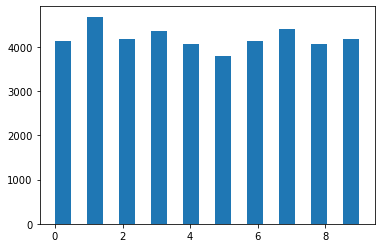

In [8]:
plt.hist(labels, bins=19)
plt.show()

In [9]:
# calculate the majority class
mode = stats.mode(labels)
print(mode[0]) # 1 is the majority class

[1]


## Task 2

In [10]:
# calculate the ink per image
ink = np.array([sum(row) for row in digits])
# calculate the mean ink per digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# claclulate the std per digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]

In [11]:
labels_ink = np.column_stack((range(10), ink_mean, ink_std))
labels_ink[labels_ink[:, 1].argsort()]
# digit 0 and 1 will be the easiest to distinguish
# digit 4 and 9 as well as digit 2 and 8 and digit 3 and 6 will be especially hard to distinguish

array([[1.00000000e+00, 1.51884663e+04, 4.40946170e+03],
       [7.00000000e+00, 2.29312443e+04, 6.16834088e+03],
       [4.00000000e+00, 2.42327225e+04, 6.37463346e+03],
       [9.00000000e+00, 2.45537500e+04, 6.46523133e+03],
       [5.00000000e+00, 2.58359204e+04, 7.52660299e+03],
       [6.00000000e+00, 2.77349173e+04, 7.53050319e+03],
       [3.00000000e+00, 2.83201880e+04, 7.57410454e+03],
       [2.00000000e+00, 2.98710994e+04, 7.65300620e+03],
       [8.00000000e+00, 3.01841484e+04, 7.77739636e+03],
       [0.00000000e+00, 3.46324076e+04, 8.46189204e+03]])

In [12]:
# z-score standardize ink feature
from sklearn.preprocessing import scale
ink = scale(ink).reshape(-1, 1)

In [13]:
from sklearn.linear_model import LogisticRegression
mlr_ink = LogisticRegression(multi_class='multinomial', random_state=16).fit(ink, labels)

In [14]:
pred_labels = mlr_ink.predict(ink)
mlr_ink.score(ink, labels) # accuracy = 0.23

0.22680952380952382

## Task 3

In [15]:
import math
angle = np.zeros((len(digits), 1))

# calculate the angle of the first to the last non-zero pixel
for image in range(0, len(digits)):
    pixels = np.array(np.where(digits[image,:] > 0))
    first_pixel = pixels[:,0]
    last_pixel = pixels[:,-1]
    angle[image] = math.atan2(first_pixel,last_pixel) 

In [16]:
# calculate the mean angle per digit class
angle_mean = [np.mean(angle[labels == i]) for i in range(10)]
# claclulate the std per digit class
angle_std = [np.std(angle[labels == i]) for i in range(10)]

In [18]:
labels_angle = np.column_stack((range(10), angle_mean, angle_std))
labels_angle[labels_angle[:, 1].argsort()]
# digit 6 will be the easiest to distinguish
# digit 3 and 0 will be especially hard to distinguish

array([[6.        , 0.13480815, 0.02991747],
       [2.        , 0.18740269, 0.0502869 ],
       [1.        , 0.20070971, 0.01833319],
       [3.        , 0.20295307, 0.02845111],
       [0.        , 0.20633279, 0.03533058],
       [8.        , 0.21387058, 0.02416395],
       [4.        , 0.22139086, 0.02552286],
       [5.        , 0.23635413, 0.05788499],
       [9.        , 0.25286872, 0.01764282],
       [7.        , 0.26603898, 0.02351628]])

In [19]:
# z-score standardize ncomp feature
angle = scale(angle).reshape(-1, 1)

In [20]:
mlr_angle = LogisticRegression(multi_class='multinomial', random_state=16).fit(angle, labels)

In [21]:
pred_labels = mlr_angle.predict(angle)
mlr_angle.score(angle, labels) # accuracy = 0.34

0.3428809523809524

## Task 4

In [22]:
features = np.hstack((ink, angle))

In [23]:
mlr_both = LogisticRegression(multi_class='multinomial', random_state=16).fit(features, labels)

In [24]:
pred_labels = mlr_both.predict(features)
mlr_both.score(features, labels) # accuracy = 0.40

0.39804761904761904

## Task 5

In [417]:
#!pip install opencv-python

     |████████████████████████████████| 46.4 MB 214 kB/s eta 0:00:01    |▊                               | 1.0 MB 3.8 MB/s eta 0:00:13     |████████████████                | 23.2 MB 5.9 MB/s eta 0:00:04


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
mnist_scaled = scaler.fit_transform(df[:, 1:])
mnist_scaled.shape

(42000, 707)

In [75]:
mnist_scaled = np.column_stack((labels, mnist_scaled))
mnist_scaled.shape

(42000, 708)

In [76]:
index = np.random.choice(mnist_scaled.shape[0], 5000, replace=False)
sample = mnist_scaled[index]

In [77]:
sample_labels = sample[:, 0]
sample_digits = sample[:, 1:]

In [78]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'C':np.logspace(-3,3,7), 'penalty':['l1'], 'solver':['saga']}
mlr = LogisticRegression(multi_class='multinomial', random_state=16)
mlr_cv = GridSearchCV(mlr, param, cv=5, scoring='accuracy')
mlr_cv.fit(sample_digits, sample_labels)

/Users/noltinho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/noltinho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/noltinho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/noltinho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/noltinho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/noltinho/opt/anaconda3/lib/p

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])